# Pedaleando la red de EcoBici de la Ciudad de Buenos Aires...

<p float="left">
  <img align="right" width="300" height="200" src="https://www.buenosaires.gob.ar/sites/gcaba/files/ecobici_3_0.jpg"/> En este notebook intentaremos integrar algunos de los conceptos que fuimos viendo hasta ahora a partir de un caso de análisis bastante práctico para trabajar con redes de transporte. 

La red de ecobicis de la Ciudad de Buenos Aires nos permitirá trabajar con un esquema de viajes origen/destino donde aplicaremos varias de las herramientas que vimos hasta acá para entender algunas de las particularidades de este servicio de transporte.

La idea, es que armemos un flujo de trabajo corto en el que podamos identificar un conjunto de necesidades traducibles en `features` o atributos que resuelvan o respondan determinadas preguntas.

Encapsularemos distintas funcionalidades y elaboraremos un montior de viajes que nos permita reconstruir el patron territorial de la demanda y uso del sistema publico de bicicletas.
</p>

In [ ]:
# Importamos numpy y pandas para manipular nuestros datos
import pandas as pd
import numpy as np

In [ ]:
# construyamos el path de cada uno en base al año
paths = ['https://storage.googleapis.com/python_mdg/data_cursos/bici{}_cdn.csv'.format(str(y)) for y in range(15,20)] 

# y guardemos cada df bajo una key
df = {}
for p in paths:
    df[p[58:60]] = pd.read_csv(p)

In [ ]:
# Por ejemplo, nuestro primer año de la serie, 2015...
df['15'].head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,134224.0,2015-12-31 20:30:05,14.0,Aduana,3,Tribunales,11.0,MASCULINO,71.0
1,134224.0,2015-12-31 19:58:37,25.0,Retiro,2,Aduana,3.0,MASCULINO,71.0
2,222555.0,2015-12-31 18:42:54,57.0,Congreso,8,Retiro,2.0,MASCULINO,26.0
3,11504.0,2015-12-31 17:55:29,15.0,Plaza Almagro,17,Congreso,8.0,MASCULINO,26.0
4,183241.0,2015-12-31 16:59:29,24.0,Plaza Almagro,17,Plaza Almagro,17.0,FEMENINO,59.0


In [ ]:
# Un poco de información adicional
df['15'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503867 entries, 0 to 503866
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bici_id_usuario               503867 non-null  float64
 1   bici_Fecha_hora_retiro        503867 non-null  object 
 2   bici_tiempo_uso               495440 non-null  float64
 3   bici_nombre_estacion_origen   503867 non-null  object 
 4   bici_estacion_origen          503867 non-null  int64  
 5   bici_nombre_estacion_destino  495440 non-null  object 
 6   bici_estacion_destino         495440 non-null  float64
 7   bici_sexo                     503867 non-null  object 
 8   bici_edad                     503867 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 34.6+ MB


In [ ]:
df.keys()

dict_keys(['15', '16', '17', '18', '19'])

Ahora hagamos algunos gráficos para entender con qué estamos trabajando, por ejemplo...cuál es la edad de los usuarios del sistema de ecobici?

In [ ]:
# Importamos algunas librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

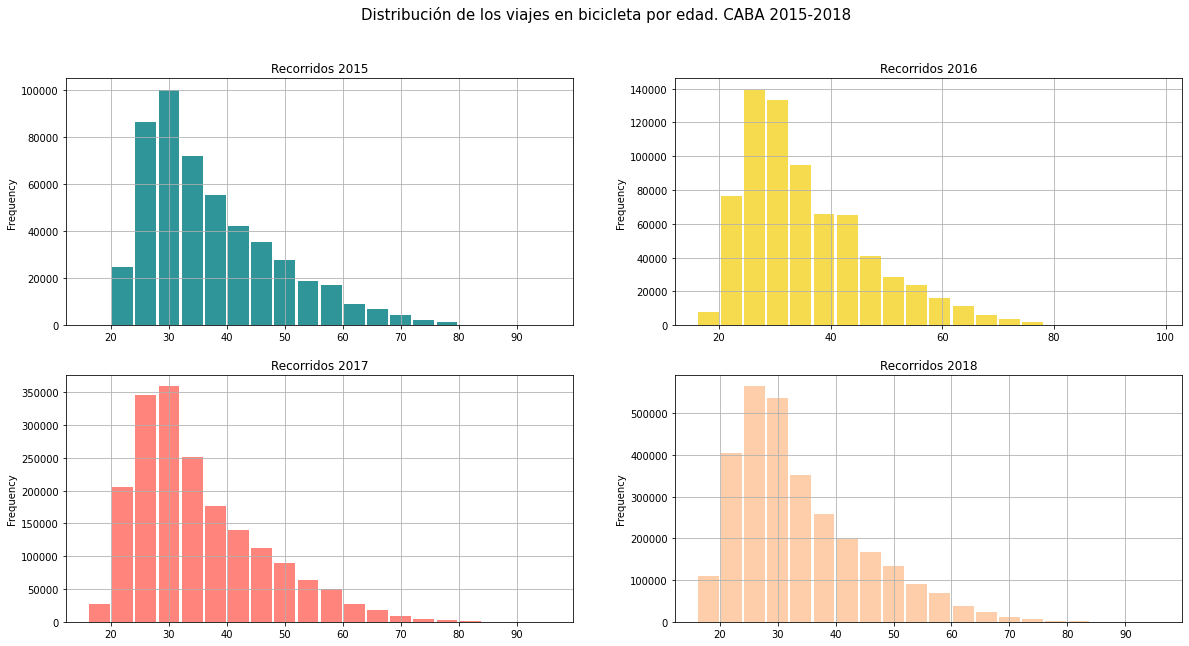

In [ ]:
# Graficamos un histograma por año para ver cantidad de casos por edad
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
viajes15 = df['15'].bici_edad
viajes15.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#2F9599')
plt.title('Recorridos 2015')

plt.subplot(2,2,2)
viajes16 = df['16'].bici_edad
viajes16.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#F7DB4F')
plt.title('Recorridos 2016')

plt.subplot(2,2,3)
viajes17 = df['17'].bici_edad
viajes17.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FF847C')
plt.title('Recorridos 2017')

plt.subplot(2,2,4)
viajes18 = df['18'].bici_edad
viajes18.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FECEAB')
plt.title('Recorridos 2018')

plt.suptitle('Distribución de los viajes en bicicleta por edad. CABA 2015-2018', fontsize=15);

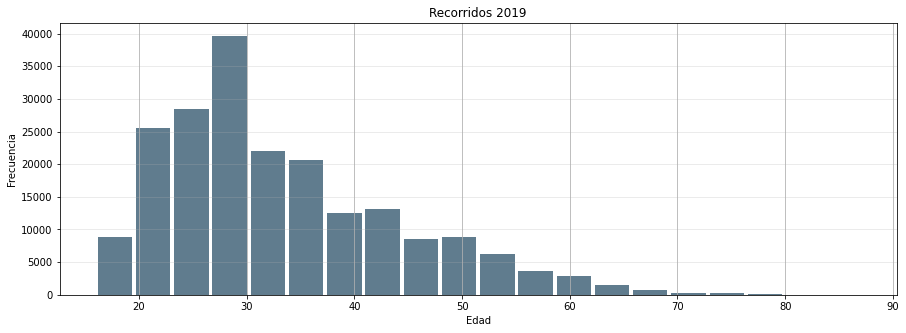

In [ ]:
# ... y ahora el último año disponible
viajes19 = df['19'].bici_edad
viajes19.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(15,5))
plt.title('Recorridos 2019')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3);

Un patrón que podemos ver en todos los años es una distribución con un claro sesgo a la izquierda. Es decir, que estamos frente a un medio de movilidad donde el usuario frecuente suele estar en torno a los 30 años de edad. Y qué pasa con el género?

In [ ]:
# creamos las distribuciones de edad por sexo
freqs = np.array([[e for e, s in zip(edad, sexo) if s=='MASCULINO'], 
                  [e for e, s in zip(edad, sexo) if s=='FEMENINO']], dtype='object')

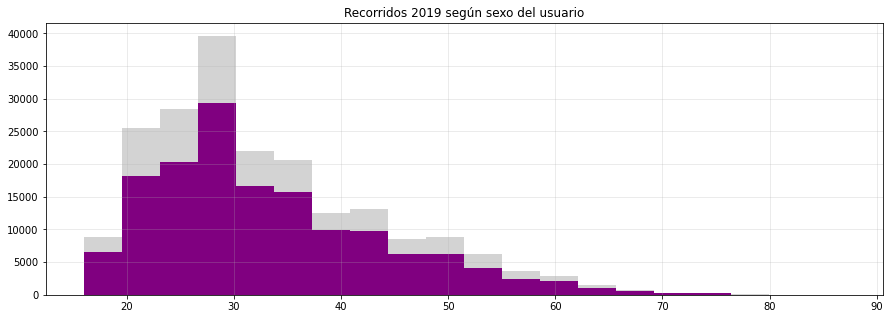

In [ ]:
# Diferencias de uso por genero (2019)
edad = df['19'].bici_edad
sexo = df['19'].bici_sexo

plt.figure(figsize=(15,5))
plt.hist(freqs, color=['purple','lightgrey'], bins=20, stacked=True)
plt.grid(alpha=0.3)
plt.title('Recorridos 2019 según sexo del usuario')
plt.show();

Lo que podemos ver ahora es que, al menos para el año 2019 los usuarios son mayormente hombres. Se animan a comprobar si este patrón se reproduce en otros años? Construyamos algunos gráficos de torta para ver la distribución porcentual de casos por año, entre hombres y mujeres.

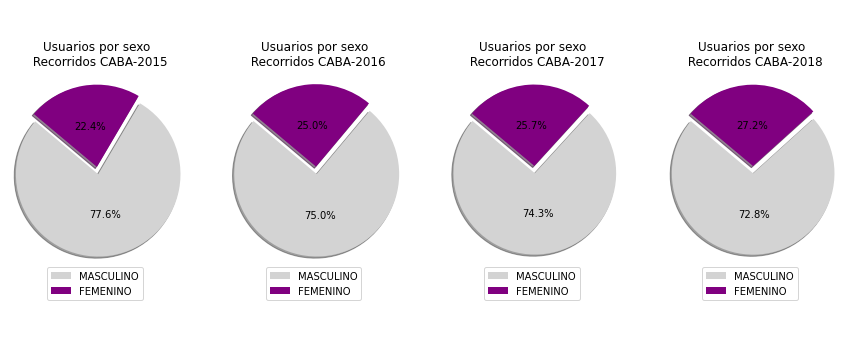

In [ ]:
# Estilos
explode = (0.09, 0) 
colors = ['lightgrey', 'purple']
labels = ['MASCULINO', 'FEMENINO']


# Plot 1
sizes = [df['15'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
         df['15'].groupby(['bici_sexo'])['bici_edad'].count()[0]]

# Plot 2
sizes2 = [df['16'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['16'].groupby(['bici_sexo'])['bici_edad'].count()[0]]

# Plot 3
sizes3 = [df['17'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['17'].groupby(['bici_sexo'])['bici_edad'].count()[0]] 

# Plot 4
sizes4 = [df['18'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['18'].groupby(['bici_sexo'])['bici_edad'].count()[0]]
 
# Grilla de plots
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
plt.pie(sizes, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
 
plt.legend(labels, loc=(0.22,0.1))
plt.axis('equal')
plt.title('Usuarios por sexo \n Recorridos CABA-2015', y=0.8)

plt.subplot(1,4,2)
plt.pie(sizes2, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2016', y=0.8)
plt.axis('equal')

plt.subplot(1,4,3)
plt.pie(sizes3, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2017', y=0.8)
plt.axis('equal')

plt.subplot(1,4,4)
plt.pie(sizes4, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2018', y=0.8)
plt.axis('equal')
plt.show();

Esta es otra forma de constatar lo que vimos en nuestros histogramas. Cuando tenemos pocas categorías, los gráficos de torta también son una buena alternativa para ver cómo se distribuyen los valores de una variable. Hasta ahora, sabemos que la mayoría de los usuarios son varones jóvenes.

Y...¿en qué momento del día es cuando más se utiliza el servicio? Por defecto, los datos de tipo fecha no son trabajados como tales. Para ello, python requiere del módulo datetime. Este, nos sólo reconoce los dtypes de tipo fecha sino que también nos permite realizar cualquier tipo de operación con ellos. Desde obtener el mes, hasta el día de la semana. Veamos algunos ejemplos rápidos usando funciones regulares.

In [ ]:
from datetime import datetime

In [ ]:
# Función para devolver columna de fecha y hora
def fecha_hora(df):
    '''
    Separa la informacion de fecha y hora que en todos los df estan juntas como string
    
    Argumentos
    ----------
    
    df: el dataframe de cada año de recorridos de bicis
    '''
    
    # Se splitea la columna en dos: fecha y hora que en todos los df estan juntas como str
    fecha_hora = df['bici_Fecha_hora_retiro'].str.split(' ', expand=True)
    
    # Se almacena en un nuevo df
    fecha_hora.columns = ['Fecha','Hora']
    
    return fecha_hora

In [ ]:
fecha_hora(df['18'])

,Fecha,Hora
0,2018-12-31,23:56:42
1,2018-12-31,23:40:14
2,2018-12-31,23:31:39
3,2018-12-31,23:27:19
4,2018-12-31,23:22:29
...,...,...
2970474,2018-01-01,00:20:31
2970475,2018-01-01,00:20:22
2970476,2018-01-01,00:20:14
2970477,2018-01-01,00:18:05


In [ ]:
# Función para devolver dia de la semana
def obtener_dia_semana(fecha):
    '''
    Devuelve el dia de la semana a partir de la fecha
    
    Argumentos
    ----------
    
    fecha: columna del df, para usarla hay que mapearla porque strptime no toma series 
    '''
    return datetime.strptime(fecha,'%Y-%m-%d').weekday()

Veamos cómo podríamos aplicar ambas funciones. Inicialmente podríamos...

In [ ]:
# 1) instanciar las columnas de fecha y hora 
tiempo19 = fecha_hora(df['19'])

# 2) y a partir de la Fecha obtener el dia de la semana mapeando la última función
dia19 = tiempo19.Fecha.map(obtener_dia_semana)

In [ ]:
tiempo19.Fecha

0         2019-02-22
1         2019-02-22
2         2019-02-22
3         2019-02-22
4         2019-02-22
             ...    
204102    2019-01-01
204103    2019-01-01
204104    2019-01-01
204105    2019-01-01
204106    2019-01-01
Name: Fecha, Length: 204107, dtype: object

In [ ]:
# Podemos crear una copia de nuestro dataframe para seguir trabajando sobre un objeto nuevo
df19b = df['19'].copy()

In [ ]:
# Creamos una función para acomodar un poco más nuestra información y mostrar el día de la semana
def nombre_dia(serie):
    '''
     Reemplaza numero de dia por nombre
    
    Argumentos
    ----------
    serie: pd.Series()
    '''
    dia = serie.replace({0:'lunes', 
                         1:'martes', 
                         2:'miercoles', 
                         3:'jueves', 
                         4:'viernes', 
                         5:'sabado', 
                         6:'domingo'})
    return dia

In [ ]:
# Dias de la semana
df19b['dia_semana'] = nombre_dia(dia19)

In [ ]:
# Hora del dia
df19b['hora_dia'] = tiempo19.Hora

In [ ]:
# convertimos el tipo object a datetime para tener la hora separada
df19b['hora'] = pd.to_datetime(df19b['hora_dia']).dt.hour

Ahora, en base a esta información podemos clasificar los distintos momentos del día y así construir una variable categórica que nos simplifique un poco la manera de visualizar nuestros datos.

In [ ]:
# Funcion para clasificar el momento del dia en base a horarios
def momento_dia(x):
    '''
     Clasifica momentos del día según un horario predefinido.
    
     Argumentos
     ----------
     x: str
    '''
    
    if (x['hora_dia']>= '07:00:00') & (x['hora_dia']<= '11:30:00'):
        return '1.Mañana'
    
    elif (x['hora_dia']>='11:30:00') & (x['hora_dia'] <= '14:30:00'):
        return '2.Mediodia'
    
    elif (x['hora_dia']>'14:30:00') & (x['hora_dia'] < '17:00:00'):
        return '3.Media tarde'
    
    elif (x['hora_dia']>='17:00:00') & (x['hora_dia'] <= '19:00:00'):
        return '4.Tarde'
    
    elif (x['hora_dia']>'19:00:00') & (x['hora_dia'] <= '21:00:00'):
        return '5.Tarde noche'
    
    elif (x['hora_dia']>'21:00:00') & (x['hora_dia'] <= '24:00:00'):
        return '6.Noche'
    
    elif (x['hora_dia']>'24:00:00') & (x['hora_dia'] < '07:00:00'):
        return '7.Madrugada'

Este es un buen ejemplo de cómo aplicar una función regular a partir de una anónima. Fíjense que lo que estamos pasando como argumento (nuestra x) no es otra cosa que cada fila de nuestra serie:

In [ ]:
# aplicamos nuestra función regular con otra anónima
momento_dia = df19b.apply(lambda x: momento_dia(x),1)

In [ ]:
df19b['momento_dia'] = momento_dia

Veamos ahora de qué manera podemos visualizar esta nueva información, por ejemplo, veamos la cantidad de varones y mujeres en los distintos momentos del día...

In [ ]:
# Agrupamos la cantidad de casos
sexo_dia = df19b.groupby(['momento_dia','bici_sexo'])[['bici_sexo']].count()
sexo_dia.columns = ['Cantidad']
sexo_dia = sexo_dia.reset_index()

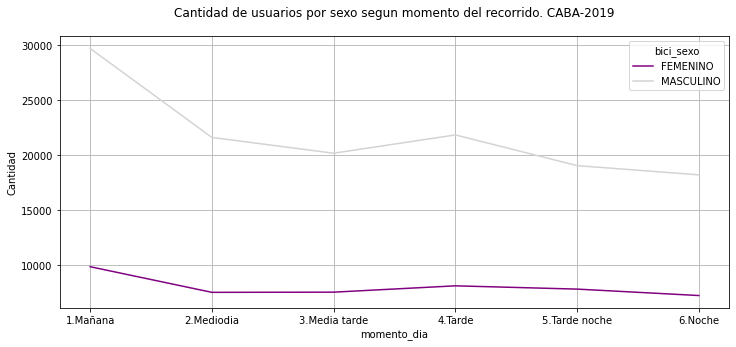

In [ ]:
# ... y ploteamos
plt.figure(figsize=(12,5))
ax = sns.lineplot(x="momento_dia", y="Cantidad", hue='bici_sexo', 
                  data=sexo_dia.loc[sexo_dia['bici_sexo']!='NO INFORMADO'], palette = ['purple','lightgrey'])
ax.set_facecolor("white")
plt.title('Cantidad de usuarios por sexo segun momento del recorrido. CABA-2019', y=1.05)
plt.grid()

Ahora, veamos si el uso de las bicicletas registra algún horario de uso intensivo. No perdamos de vista que todavía seguimos analizando nuestro datos de manera agregada. Todavía no hemos elegido un día en concreto. Esto lo hacemos como una primera aproximación, más bien general, que nos permita cierta familiaridad con nuestros datos. Algo así como tener un primer pantallazo.

Armamos entonces una con usuarios totales por hora de retiro. Esto nos va a permitir armar una heat table con las distintas horas del día y los retiros registrados. Para concretarlo, vamos a apelar al método pivot_table de pandas.

In [ ]:
# Probemos con 'Horas' en el eje x para la cantidad de retiros por hora segun dia de la semana
pivot1 = pd.pivot_table(df19b,
                        values="bici_sexo",
                        index=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.weekday, 
                        columns=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.hour, 
                        aggfunc = 'count',fill_value=0)

# Y con 'Horas' en el eje y
pivot2 = pd.pivot_table(df19b, 
                        values="bici_sexo",
                        index=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.hour, 
                        columns=["dia_semana"], 
                        aggfunc = 'count',fill_value=0)

In [ ]:
# Acá se ve con claridad la matriz que armamos...
pivot1

bici_Fecha_hora_retiro,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
bici_Fecha_hora_retiro,,,,,,,,,,,,,,,,,,,,,
0,790,551,313,175,133,346,659,1199,1535,1325,...,1859,1893,2035,2589,2836,2481,2089,1782,1249,928
1,917,586,319,188,166,412,811,1523,1732,1421,...,1784,1774,1932,2101,2245,2018,1957,1662,1142,905
2,919,647,369,195,161,452,823,1589,2142,1739,...,1828,1778,2144,2476,2696,2510,2145,1804,1278,1093
3,1026,752,393,219,217,390,759,1453,1881,1634,...,1819,1857,2201,2645,3135,2620,2294,1916,1406,1156
4,1138,781,413,253,189,360,789,1584,1990,1534,...,1581,1706,2129,2497,2659,2264,2041,1591,1249,944
5,995,820,699,476,356,357,503,706,855,909,...,1231,1199,1172,1079,1069,1211,1174,1064,885,776
6,789,704,527,374,323,362,476,434,425,372,...,696,821,916,944,988,1059,1013,986,841,794


In [ ]:
pivot2

dia_semana,domingo,jueves,lunes,martes,miercoles,sabado,viernes
bici_Fecha_hora_retiro,,,,,,,
0,789,1026,790,917,919,995,1138
1,704,752,551,586,647,820,781
2,527,393,313,319,369,699,413
3,374,219,175,188,195,476,253
4,323,217,133,166,161,356,189
5,362,390,346,412,452,357,360
6,476,759,659,811,823,503,789
7,434,1453,1199,1523,1589,706,1584
8,425,1881,1535,1732,2142,855,1990


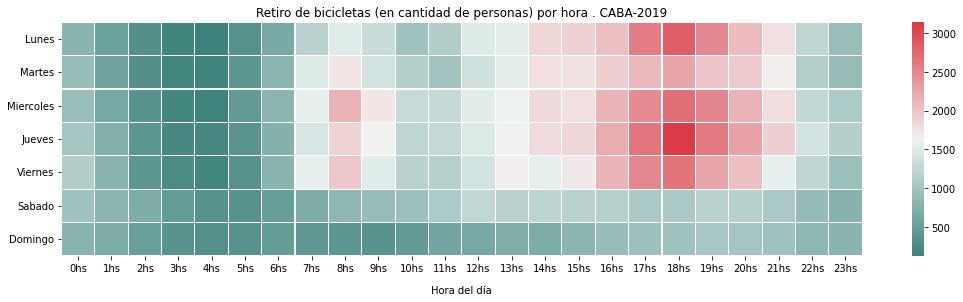

In [ ]:
# Graficamos un heatmap de seaborn utilizando pivot1
plt.figure(figsize=(15,4))
ax = sns.heatmap(pivot1, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=360 )

# Eje x
ax.set_xlabel("Hora del día", labelpad = 12)
labels = [item.get_text()+''+'hs' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Eje y
ax.set_yticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], rotation = 360)
ax.set_ylabel("")

ax.set_title('Retiro de bicicletas (en cantidad de personas) por hora . CABA-2019', y=1.05)
plt.tight_layout()
plt.show();

In [ ]:
# Hagamos lo mismo con los otros años

#2015
pivot15 = pd.pivot_table(df['15'], values="bici_sexo",
                         index=pd.to_datetime(df['15'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['15'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

#2016
pivot16 = pd.pivot_table(df['16'], values="bici_sexo",
                         index=pd.to_datetime(df['16'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['16'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

#2017
pivot17 = pd.pivot_table(df['17'], values="bici_sexo",
                         index=pd.to_datetime(df['17'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['17'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

#2018
pivot18 = pd.pivot_table(df['18'], values="bici_sexo",
                         index=pd.to_datetime(df['18'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['18'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

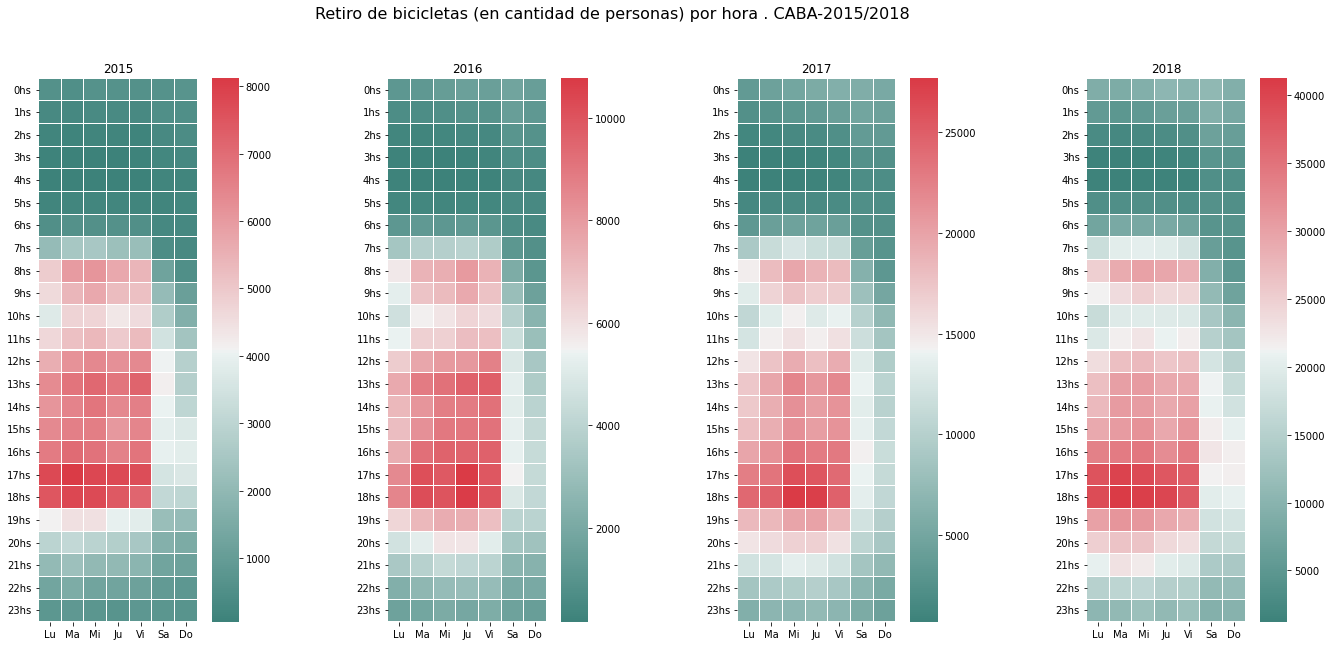

In [ ]:
# Y usemoslos para graficar un heatmap con pivot2 (verticalmente!)
fig = plt.figure(figsize=(24,10))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

#2015
sns.heatmap(pivot15, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax1.set_ylabel("Hora del día", labelpad = 12)
labels1 = [item.get_text()+''+'hs' for item in ax1.get_yticklabels()]
ax1.set_yticklabels(labels,  rotation = 0)
ax1.set_ylabel("")
ax1.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax1.set_xlabel("")
ax1.set_title('2015', y=1.01)

#2016
sns.heatmap(pivot16, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax2)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax2.set_ylabel("Hora del día", labelpad = 12)
labels2 = [item.get_text()+''+'hs' for item in ax2.get_yticklabels()]
ax2.set_yticklabels(labels,  rotation = 0)
ax2.set_ylabel("")
ax2.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax2.set_xlabel("")
ax2.set_title('2016', y=1.01)

#2017
sns.heatmap(pivot17, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=360 )
ax3.set_ylabel("Hora del día", labelpad = 12)
labels3 = [item.get_text()+''+'hs' for item in ax3.get_yticklabels()]
ax3.set_yticklabels(labels,  rotation = 0)
ax3.set_ylabel("")
ax3.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax3.set_xlabel("")
ax3.set_title('2017', y=1.01)

#2018
sns.heatmap(pivot18, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax4)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=360 )
ax4.set_ylabel("Hora del día", labelpad = 12)
labels4 = [item.get_text()+''+'hs' for item in ax4.get_yticklabels()]
ax4.set_yticklabels(labels,  rotation = 0)
ax4.set_ylabel("")
ax4.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax4.set_xlabel("")
ax4.set_title('2018', y=1.01)

fig.suptitle('Retiro de bicicletas (en cantidad de personas) por hora . CABA-2015/2018', fontsize=16) 
plt.show();

Por último, veamos si en estos horarios hay un perfil de usuario específico. Por ejemplo, son usuarios más jóvenes los que retiran bicicletas en estas franjas horarias?

In [ ]:
!pip install plotly_express
import plotly_express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Plotly dispone de varias clases muy interesantes, tanto para construir gráficos más comunes o conocidos como un scatter plot, como así también choropletas, mapas de puntos y o incluso de calor.

In [ ]:
df_scat19 = df19b.groupby(['bici_nombre_estacion_origen',
                           'hora','bici_sexo'])[['bici_edad','bici_tiempo_uso']].mean().reset_index()

In [ ]:
df_scat19.head()

,bici_nombre_estacion_origen,hora,bici_sexo,bici_edad,bici_tiempo_uso
0,25 de Mayo,0,MASCULINO,16.0,32.0
1,25 de Mayo,2,FEMENINO,30.0,29.0
2,25 de Mayo,3,FEMENINO,30.0,28.0
3,25 de Mayo,3,MASCULINO,29.0,7.0
4,25 de Mayo,4,FEMENINO,45.0,16.5


In [ ]:
# Dataframe con valores por hora
df_scat19 = df19b.groupby(['bici_nombre_estacion_origen',
                           'hora','bici_sexo'])[['bici_edad','bici_tiempo_uso']].mean().reset_index()


# Plot
px.scatter(df_scat19.sort_values(by='hora',ascending=True), 
           x="bici_edad", y="bici_tiempo_uso", 
           animation_frame="hora", 
           animation_group="bici_nombre_estacion_origen",
           labels=dict(bici_edad="Edad promedio de usuarios", 
                       bici_tiempo_uso="Tiempo medio de uso", 
                       NOMBRE = 'Estacion', hora = 'hora', 
                       bici_sexo = 'Usuarios')
           )